In [21]:
import bibtexparser
from bibtexparser.bwriter import BibTexWriter
from bibtexparser.bibdatabase import BibDatabase
from dateutil.parser import parse
import datetime

In [235]:
with open('../bibtex2.bib', 'rt') as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)

In [237]:
bib_database.entries[0]

{'url': 'http://dx.doi.org/10.1007/s00158-017-1802-5',
 'title': 'Optimisation of tensile membrane structures under uncertain wind loads using PCE and kriging based metamodels',
 'piis': '85029009303',
 'pages': '1149-1161',
 'month': 'March',
 'journal': 'Structural and Multidisciplinary Optimization',
 'doi': '10.1007/s00158-017-1802-5',
 'day': '01',
 'date': '2018',
 'author': 'Subhrajit Dutta and Siddhartha Ghosh and Mandar M. Inamdar',
 'abstract': '© 2017, Springer-Verlag GmbH Germany.Tensile membrane structures (TMS) are light-weight flexible structures that are designed to span long distances with structural efficiency. The stability of a TMS is jeopardised under heavy wind forces due to its inherent flexibility and inability to carry out-of-plane moment and shear. A stable TMS under uncertain wind loads (without any tearing failure) can only be achieved by a proper choice of the initial prestress. In this work, a double-loop reliability-based design optimisation (RBDO) of TMS

In [15]:
print(bib_database.comments)

['%%%%%% ENGINEERING', '%%%%%% NUCLEAR ENGINEERING', '%%%%%% MATERIAL SCIENCES', '%%%%%% MECHANICAL ENGINEERING', '%%%%%% CIVIL ENGINEERING', '%%%%%% GEOTECHNICAL ENGINEERING', '%%%%%% HYDROLOGY', '%%%%%% MEDICINE', '%%%%%% UNCERTAINTY QUANTIFICATION', '%%%%%% ENVIRONMENTAL ENGINEERING', '%%%%%% EARTHQUAKE ENGINEERING', '%%%%%% ELECTRICAL ENGINEERING', '%%%%%% ECONOMICS', '%%%%%% ONLY CITING IN REVIEW']


In [16]:
print(bib_database.strings)

OrderedDict([('maintainer', 'Damar Wicaksono')])


In [17]:
print(bib_database.preambles)

['Maintained by Damar Wicaksono', 'This bibliography was generated on \\today']


In [119]:
bib_database.entries[11]

{'keywords': 'CivilEngineering',
 'url': 'https://link.springer.com/article/10.1007/s00158-017-1802-5',
 'publisher': 'Springer',
 'year': '2017',
 'pages': '1--13',
 'journal': 'Structural and Multidisciplinary Optimization',
 'author': 'Dutta, Subhrajit and Ghosh, Siddhartha and Inamdar, Mandar M',
 'title': 'Optimisation of tensile membrane structures under uncertain wind loads using PCE and kriging based metamodels',
 'ENTRYTYPE': 'article',
 'ID': 'dutta2017optimisation'}

In [240]:
bibentry['keywords'] = 'Nuclear Engineering'

In [268]:
db = BibDatabase()
db.entries = bib_entries[0:5]

In [242]:
db.entries

[{'title': 'Optimisation of tensile membrane structures under uncertain wind loads using PCE and kriging based metamodels',
  'ENTRYTYPE': 'article',
  'journal': 'Structural and Multidisciplinary Optimization',
  'pages': '1149-1161',
  'date': '2018',
  'month': 'March',
  'day': '01',
  'doi': '10.1007/s00158-017-1802-5',
  'piis': '85029009303',
  'url': 'http://dx.doi.org/10.1007/s00158-017-1802-5',
  'author': 'Subhrajit Dutta and Siddhartha Ghosh and Mandar M. Inamdar',
  'abstract': '© 2017, Springer-Verlag GmbH Germany.Tensile membrane structures (TMS) are light-weight flexible structures that are designed to span long distances with structural efficiency. The stability of a TMS is jeopardised under heavy wind forces due to its inherent flexibility and inability to carry out-of-plane moment and shear. A stable TMS under uncertain wind loads (without any tearing failure) can only be achieved by a proper choice of the initial prestress. In this work, a double-loop reliability-ba

In [243]:
db.strings = bib_database.strings

In [244]:
db.preambles = bib_database.preambles

In [269]:
writer = BibTexWriter()
with open('bibtex3.bib', 'wt') as bibfile:
    bibfile.write(writer.write(db))

## Get Title and Abstract from Scopus

In [311]:
import requests
import json
from xml.etree import ElementTree as ET
import re
import dateutil

In [312]:
MY_API_KEY = "cabb196bc79b99b6171dec1b7a473d90"

In [313]:
url_header ="https://api.elsevier.com/content/search/scopus?query=REF(uqlab)"

In [314]:
marelli_id = '25929446300'
sudret_id = '6603259697'

In [315]:
#url_header = "https://api.elsevier.com/content/search/author?query=authlast(Wicaksono)%20and%20authfirst(Damar)&apiKey={}"
url = url_header.format(MY_API_KEY)
resp = requests.get(url,
                    headers={'Accept':'application/json',
                             'X-ELS-APIKey': MY_API_KEY},
                   params={'facets':'au-id(exclude=6603259697, exclude=25929446300)',
                           'start':'1'})
#                   params={'facets':'srctype(exclude=j)'})
resp

<Response [200]>

In [62]:
results = json.loads(resp.text.encode("utf-8"))

In [181]:
def get_bib_details(scopus_entry, api_key):
    """Get the article details from SCOPUS based on its ID.
    
    These are the current keys:
     
     - author: ``
     - title:
     - year:
     - pages:
     - volume:
     - journal:
     - doi:
     - url:
     - ENTRYTYPE:
    """
    
    # Get info from search result
    record = get_search_details(scopus_entry)
    
    # Get authors
    authors = get_authors(record['piis'], api_key)
    record['author'] = " and ".join(authors)
    
    # Get abstract
    record['abstract'] = get_abstract(record['piis'], api_key)
    
    # Create ID
    record['ID'] = "{}{}".format(authors[0].split()[-1],
                                 record['date'])
    
    return record
    

{'opensearch:totalResults': '60',
 'opensearch:startIndex': '1',
 'opensearch:itemsPerPage': '25',
 'opensearch:Query': {'@role': 'request',
  '@searchTerms': 'REF(uqlab)',
  '@startPage': '1'},
 'link': [{'@_fa': 'true',
   '@ref': 'self',
   '@href': 'https://api.elsevier.com/content/search/scopus?start=1&count=25&query=REF%28uqlab%29&facets=au-id(exclude=6603259697, exclude=25929446300)',
   '@type': 'application/json'},
  {'@_fa': 'true',
   '@ref': 'first',
   '@href': 'https://api.elsevier.com/content/search/scopus?start=0&count=25&query=REF%28uqlab%29&facets=au-id(exclude=6603259697, exclude=25929446300)',
   '@type': 'application/json'},
  {'@_fa': 'true',
   '@ref': 'prev',
   '@href': 'https://api.elsevier.com/content/search/scopus?start=0&count=25&query=REF%28uqlab%29&facets=au-id(exclude=6603259697, exclude=25929446300)',
   '@type': 'application/json'},
  {'@_fa': 'true',
   '@ref': 'next',
   '@href': 'https://api.elsevier.com/content/search/scopus?start=26&count=25&query

In [741]:
"Book" in ["Conference Proceeding", "Book Series", "Book"]

True

In [753]:
def get_search_details(scopus_entry):
    """Get the article details from SCOPUS based on its ID.
    

    """
    record = dict()
    
    # Parse title
    
    record['title'] = scopus_entry['dc:title']
    
    if scopus_entry['prism:aggregationType'] == "Journal":
        record['ENTRYTYPE'] = "article"
        record['journal'] = scopus_entry['prism:publicationName']
    elif scopus_entry['prism:aggregationType'] in ["Conference Proceeding", "Book Series", "Book"]:
        record['ENTRYTYPE'] = "inproceedings"
        record['booktitle'] = scopus_entry['prism:publicationName']
    else:
        print("Unexpected entry type, re-check!")
        raise
    
    # Parse page range
    record['pages'] = scopus_entry['prism:pageRange']
    if record['pages'] is None:
        record['pages'] = ''
    
    # Parsing dates
    cover_date = parse(scopus_entry['prism:coverDate'])
    record['date'] = cover_date.strftime("%Y")
    record['month'] = cover_date.strftime("%B")
    record['day'] = cover_date.strftime("%d")

    # DOI
    try:
        record['doi'] = scopus_entry['prism:doi']
    except:
        record['doi'] = ''

    # Scopus ID
    try:
        record['piis'] = scopus_entry['dc:identifier'].split(":")[-1]
    except:
        record['piis'] = ''
    
    # Create URL
    if record['doi']:
        record['url'] = "http://dx.doi.org/{}".format(record['doi'])
    else:
        record['url'] = ''
    
    return record

In [195]:
bibentry = get_bib_details(results['search-results']['entry'][10], MY_API_KEY)

In [136]:
results['search-results']['entry'][-1].keys()

dict_keys(['@_fa', 'link', 'prism:url', 'dc:identifier', 'eid', 'dc:title', 'dc:creator', 'prism:publicationName', 'prism:issn', 'prism:volume', 'prism:pageRange', 'prism:coverDate', 'prism:coverDisplayDate', 'prism:doi', 'pii', 'citedby-count', 'affiliation', 'prism:aggregationType', 'subtype', 'subtypeDescription', 'source-id', 'openaccess', 'openaccessFlag'])

In [140]:
a = parse(results['search-results']['entry'][0]['prism:coverDate'])

In [210]:
get_authors(results['search-results']['entry'][i]['dc:identifier'].split(":")[-1], MY_API_KEY)

KeyError: 'ce:given-name'

In [234]:
bib_entries[-5]

{'title': 'Kriging-based inverse uncertainty quantification of nuclear fuel performance code BISON fission gas release model using time series measurement data',
 'ENTRYTYPE': 'article',
 'journal': 'Reliability Engineering and System Safety',
 'pages': '422-436',
 'date': '2018',
 'month': 'January',
 'day': '01',
 'doi': '10.1016/j.ress.2017.09.029',
 'piis': '85030669828',
 'url': 'http://dx.doi.org/10.1016/j.ress.2017.09.029',
 'author': 'Xu Wu and Tomasz Kozlowski and Hadi Meidani',
 'abstract': '© 2017 Elsevier LtdIn nuclear reactor fuel performance simulation, fission gas release (FGR) and swelling involve treatment of several complicated and interrelated physical processes, which inevitably depend on uncertain input parameters. However, the uncertainties associated with these input parameters are only known by “expert judgment”. In this paper, inverse Uncertainty Quantification (UQ) under the Bayesian framework is applied to BISON code FGR model based on Risø-AN3 time series ex

In [228]:
bib_entries = []
for i in range(25):
    bib_entries.append(get_bib_details(results['search-results']['entry'][i], MY_API_KEY))

In [ ]:
{'keywords': 'NuclearEngineering',
 'url': 'https://www.sciencedirect.com/science/article/pii/S095183201730532X',
 'publisher': 'Elsevier',
 'year': '2018',
 'pages': '422--436',
 'volume': '169',
 'journal': 'Reliability Engineering \\& System Safety',
 'author': 'Wu, Xu and Kozlowski, Tomasz and Meidani, Hadi',
 'title': 'Kriging-based inverse uncertainty quantification of nuclear fuel performance code BISON fission gas release model using time series measurement data',
 'ENTRYTYPE': 'article',
 'ID': 'wu2018kriging'}

In [740]:
def get_abstract(scopus_id, api_key):
    """Get the article abstract from SCOPUS based on its ID."""
    
    url_header = "https://api.elsevier.com/content/abstract/scopus_id/{}?apiKey={}"
    url_abstract = url_header.format(scopus_id, api_key)
    resp_abstract = requests.get(url_abstract,
                                 headers={'Accept':'application/json',
                                          'X-ELS-APIKey': MY_API_KEY})
    resp_abstract = json.loads(resp_abstract.text.encode("utf-8"))
    abstract = resp_abstract['abstracts-retrieval-response']['item']['bibrecord']['head']['abstracts']
    
    # Remove copyright from Elsevier journal, e.g., '© 2018 Elsevier Ltd'
    abstract = re.sub("^.*[l|L][t|T][d|D]", "", abstract)
    # Remove copyright from TANDF Journal, e.g., '... Taylor & Francis Group'
    abstract = re.sub("^.*Taylor & Francis Group\. ", "", abstract)
    abstract = re.sub("^.*B\.V\. ", "", abstract)

    return abstract

In [92]:
get_abstract('85038396163', MY_API_KEY)

'Comparing existing design methodologies for arch-type dams, model-based shape optimization can effectively reduce construction costs and leverage the properties of construction materials. To apply means of shape optimization, suitable variables need to be chosen to formulate the objective function, which is here the volume of the arch dam. A genetic algorithm is adopted as the optimization method, which allows a global search. The reliability index is considered as the main constraint. Its computation is realized by adaptive Kriging Monte Carlo simulation, which visibly increases the analysis efficiency compared with traditional Monte Carlo simulations. Constraints, such as the reliability index and further with respect to the geometry, are taken into consideration by a penalty formulation. By means of this approach, a reliability-based design can be found which ensures both the safety and serviceability of a newly designed arch-type dam.'

In [223]:
def get_authors(scopus_id, api_key):
    """Get the article abstract from SCOPUS based on its ID."""
    
    url_header = "https://api.elsevier.com/content/abstract/scopus_id/{}?apiKey={}"
    url_abstract = url_header.format(scopus_id, api_key)
    resp_abstract = requests.get(url_abstract,
                                 headers={'Accept':'application/json',
                                          'X-ELS-APIKey': MY_API_KEY})
    resp_abstract = json.loads(resp_abstract.text.encode("utf-8"))
    authors = resp_abstract['abstracts-retrieval-response']['authors']['author']
    
    authors_list = []
    
    for author in authors:
        try:
            authors_list.append("{} {}".format(author['ce:given-name'],
                                               author['ce:surname']))
        # If the format is wrong
        except:
             authors_list.append("{} {}".format(author['preferred-name']['ce:given-name'],
                                                author['preferred-name']['ce:surname']))
    
    return authors_list

In [226]:
a = get_authors('85050460012', MY_API_KEY)

In [215]:
url_header = "https://api.elsevier.com/content/abstract/scopus_id/{}"
url_abstract = url_header.format('85050460012')
resp_abstract = requests.get(url_abstract,
                             headers={'Accept':'application/json',
                                      'X-ELS-APIKey': MY_API_KEY})
resp_abstract = json.loads(resp_abstract.text.encode("utf-8"))
authors = resp_abstract['abstracts-retrieval-response']['authors']['author']

In [212]:
results['search-results']['entry'][i]['dc:identifier'].split(":")[-1]

'85050460012'

In [219]:
authors[1]['preferred-name']

{'ce:given-name': 'H. M.',
 'ce:initials': 'H.M.',
 'ce:surname': 'Torun',
 'ce:indexed-name': 'Torun H.'}

In [227]:
a

['M. Barbi',
 'H. M. Torun',
 'M. Swaminathan',
 'I. S. Stievano',
 'F. G. Canavero',
 'P. Besnier']

## Attributing keywords to entry

In [253]:
for bib_entry in bib_entries[0:5]:
    if bib_entry.get('keywords') is None:
        print(bib_entry['title'])
        print(bib_entry['abstract'])
        print(bib_entry['url'])
        print("What would be the keywords? ")
        bib_entry['keywords'] = input()

Shape optimization based design of arch-type dams under uncertainties
Comparing existing design methodologies for arch-type dams, model-based shape optimization can effectively reduce construction costs and leverage the properties of construction materials. To apply means of shape optimization, suitable variables need to be chosen to formulate the objective function, which is here the volume of the arch dam. A genetic algorithm is adopted as the optimization method, which allows a global search. The reliability index is considered as the main constraint. Its computation is realized by adaptive Kriging Monte Carlo simulation, which visibly increases the analysis efficiency compared with traditional Monte Carlo simulations. Constraints, such as the reliability index and further with respect to the geometry, are taken into consideration by a penalty formulation. By means of this approach, a reliability-based design can be found which ensures both the safety and serviceability of a newly d

In [267]:
bib_entries[2]['pages'] = ''
bib_entries[4]['pages'] = ''

In [271]:
for bib_entry in bib_entries[5:10]:
    if bib_entry.get('keywords') is None:
        print("What would be the keywords? ", end = "\r")
        print(bib_entry['title'])
        print(bib_entry['abstract'])
        print(bib_entry['url'])
        print("What would be the keywords? ")
        bib_entry['keywords'] = input()

Impact of turbulence induced loads and wave kinematic models on fatigue reliability estimates of offshore wind turbine monopiles
The cost of offshore wind turbine substructures has a significant impact on competitiveness of the wind energy market and is affected by conservative safety margins adopted in the design phase. This implies that an accurate design load prediction, especially of those resulting in fatigue damage accumulation, may help achieve more cost-effective solutions. In this article, the impact of turbulence and wave loads on fatigue reliability of pile foundations is investigated for a 5-MW offshore wind turbine. Loads obtained by varying turbulence percentiles are compared with those obtained from the full joint probability distribution of wind speed and turbulence through Monte Carlo (MC) simulations, and from the equivalent turbulence level currently adopted by IEC standards. The analyses demonstrate that a lower equivalent turbulence percentile leads to a more reali

In [283]:
for bib_entry in bib_entries:
    if bib_entry.get('keywords') is None:
        print("\r{}\n{}\n{}\n{}\n".format(
            "What would be the keywords?",
            bib_entry['title'],
            bib_entry['abstract'],
            bib_entry['url']))
        bib_entry['keywords'] = input()

What would be the keywords?
Moment-Independent Sensitivity Analysis of Enzyme-Catalyzed Reactions with Correlated Model Parameters
© 2018 The dynamic models used for biological and chemical process analysis and design usually include a significant number of uncertain model parameters. Sensitivity analysis is frequently applied to provide quantitative information regarding the influence of the parameters, as well as their uncertainties, on the model output. Various techniques are available in the literature to calculate parameter sensitivities based on local derivatives or changes in dedicated statistical moments of the model output. However, these methods may lead to an inevitable loss of information for a proper sensitivity analysis and are not directly available for problems with correlated model parameters. In this work, we demonstrate the use of a moment-independent sensitivity analysis concept in the presence and absence of parameter correlations and investigate the correlation ef

computational science and engineering
What would be the keywords?
Crosstalk analysis of printed circuits with many uncertain parameters using sparse polynomial chaos metamodels
© 2017 IEEE. This paper presents a metamodel based on the sparse polynomial chaos approach, well adapted to high-dimensional uncertainty quantification problems, applied for the analysis of crosstalk in printed circuit board microstrip traces. It enables to estimate, with a low computational cost compared to Monte Carlo (MC) simulation, statistical quantities and provides a sensitivity analysis of the crosstalk effects considering numerous uncertain variables. The approach is validated against MC simulation and shows a good efficiency and accuracy.
http://dx.doi.org/10.1109/EMCEurope.2017.8094623

electrical engineering, UQLab
What would be the keywords?
An EMC safety assessment model to analyze complex system in high speed railways
© 2017 IEEE.This paper presents a safety assessment model with regard to electro

In [286]:
bib_entries[-3]['keywords'] = 'electrical engineering, used UQLab'

In [292]:
bib_entries[5]['keywords']

'ocean engineering, used UQLab'

In [727]:
results['search-results']

{'opensearch:totalResults': '60',
 'opensearch:startIndex': '0',
 'opensearch:itemsPerPage': '60',
 'opensearch:Query': {'@role': 'request',
  '@searchTerms': 'REF(uqlab)',
  '@startPage': '0'},
 'link': [{'@_fa': 'true',
   '@ref': 'self',
   '@href': 'https://api.elsevier.com/content/search/scopus?start=0&count=100&query=REF%28uqlab%29&facets=au-id(exclude=6603259697, exclude=25929446300)',
   '@type': 'application/json'},
  {'@_fa': 'true',
   '@ref': 'first',
   '@href': 'https://api.elsevier.com/content/search/scopus?start=0&count=100&query=REF%28uqlab%29&facets=au-id(exclude=6603259697, exclude=25929446300)',
   '@type': 'application/json'}],
 'entry': [{'@_fa': 'true',
   'link': [{'@_fa': 'true',
     '@ref': 'self',
     '@href': 'https://api.elsevier.com/content/abstract/scopus_id/85050528394'},
    {'@_fa': 'true',
     '@ref': 'author-affiliation',
     '@href': 'https://api.elsevier.com/content/abstract/scopus_id/85050528394?field=author,affiliation'},
    {'@_fa': 'true',

In [293]:
import pickle

with open('scopusWebSearch20170803.p', 'wb') as output:
    pickle.dump(results, output, pickle.HIGHEST_PROTOCOL)

In [419]:
with open('scopusBibTeX20180803All.p', 'wb') as output:
    pickle.dump(bib_entries, output, pickle.HIGHEST_PROTOCOL)

In [503]:
db = BibDatabase()
db.entries = bib_database.entries
writer = BibTexWriter()
with open('scopusBibTeX{}-4.bib'.format(datetime.datetime.today().strftime("%Y%m%d")), 'wt') as bibfile:
    bibfile.write(writer.write(db))

In [301]:
datetime.datetime.today().strftime("%Y%m%d")

'20180803'

In [371]:
for bib_entry in bib_entries:
    if bib_entry['pages'] is None:
        bib_entry['pages'] = ''

## Cycle Through Search Results

In [732]:
url = url_header.format(MY_API_KEY)
resp = requests.get(url,
                    headers={'Accept':'application/json',
                             'X-ELS-APIKey': MY_API_KEY},
                    params={'count':'100'})
#                    params={'count':'100'})
resp

<Response [200]>

In [628]:
b = results['search-results']['entry'][i]['dc:identifier'].split(":")[-1]

In [630]:
get_authors(b, MY_API_KEY)

['Valentina Zega', 'Attilio Frangi', 'Andrea Guercilena', 'Gabriele Gattere']

In [734]:
res_all = pickle.load(open('scopusWebSearch20180803All.p', 'rb'))

In [735]:
res_all['search-results']

{'opensearch:totalResults': '81',
 'opensearch:startIndex': '0',
 'opensearch:itemsPerPage': '81',
 'opensearch:Query': {'@role': 'request',
  '@searchTerms': 'REF(uqlab)',
  '@startPage': '0'},
 'link': [{'@_fa': 'true',
   '@ref': 'self',
   '@href': 'https://api.elsevier.com/content/search/scopus?start=0&count=100&query=REF%28uqlab%29',
   '@type': 'application/json'},
  {'@_fa': 'true',
   '@ref': 'first',
   '@href': 'https://api.elsevier.com/content/search/scopus?start=0&count=100&query=REF%28uqlab%29',
   '@type': 'application/json'}],
 'entry': [{'@_fa': 'true',
   'link': [{'@_fa': 'true',
     '@ref': 'self',
     '@href': 'https://api.elsevier.com/content/abstract/scopus_id/85050528394'},
    {'@_fa': 'true',
     '@ref': 'author-affiliation',
     '@href': 'https://api.elsevier.com/content/abstract/scopus_id/85050528394?field=author,affiliation'},
    {'@_fa': 'true',
     '@ref': 'scopus',
     '@href': 'https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=85050

In [733]:
results = json.loads(resp.text.encode("utf-8"))
with open('scopusWebSearch{}All.p'.format(datetime.datetime.today().strftime("%Y%m%d")), 'wb') as output:
    pickle.dump(results, output, pickle.HIGHEST_PROTOCOL)

In [640]:
db = BibDatabase()
db.entries = [bib_entries_2[0]]
writer = BibTexWriter()
with open('scopusTemp.bib'.format(datetime.datetime.today().strftime("%Y%m%d")), 'wt') as bibfile:
    bibfile.write(writer.write(db))

In [637]:
for i, entry in enumerate(bib_entries_2):
    print(i, entry['title'])

0 Uncertainty quantification in non-equilibrium molecular dynamics simulations of thermal transport
1 Shape optimization based design of arch-type dams under uncertainties
2 Inverse uncertainty quantification using the modular Bayesian approach based on Gaussian process, Part 1: Theory
3 Analysis of frequency stability and thermoelastic effects for slotted tuning fork MEMS resonators
4 Uncertainty quantification of SiP based integrated voltage regulator
5 stUPscales: An R-package for spatio-temporal uncertainty propagation across multiple scales with examples in urbanwater modelling
6 Impact of turbulence induced loads and wave kinematic models on fatigue reliability estimates of offshore wind turbine monopiles
7 Sparse polynomial chaos expansion based on D-MORPH regression
8 Uncertainty propagation through an aeroelastic wind turbine model using polynomial surrogates
9 Introducing Meta-models for a More Efficient Hazard Mitigation Strategy with Rockfall Protection Barriers
10 Variance

In [757]:
len(bib_entries_all)

81

In [748]:
get_authors(res_all['search-results']['entry'][i]['dc:identifier'].split(":")[-1], MY_API_KEY)

['Onur Yuzugullu', 'Esra Erten', 'Irena Hajnsek']

In [756]:
bib_entries_all = []
for i in range(len(results['search-results']['entry'])):
    bib_entries_all.append(get_bib_details(res_all['search-results']['entry'][i], MY_API_KEY))

In [758]:
with open('scopusBibTeX20180803All.p', 'wb') as output:
    pickle.dump(bib_entries_all, output, pickle.HIGHEST_PROTOCOL)

In [652]:
for bib_entry in bib_entries:
    if bib_entry.get('keywords') is None:
        print(bib_entry['title'])
        print(bib_entry['abstract'])
        print(bib_entry['url'])
        print("What would be the keywords? ")
        bib_entry['keywords'] = input()
        clear_output(wait=True)

Uncertainty quantification in non-equilibrium molecular dynamics simulations of thermal transport
Bulk thermal conductivity estimates based on predictions from non-equilibrium molecular dynamics (NEMD) using the so-called direct method are known to be severely under-predicted since finite simulation length-scales are unable to mimic bulk transport. Moreover, subjecting the system to a temperature gradient by means of thermostatting tends to impact phonon transport adversely. Additionally, NEMD predictions are tightly coupled with the choice of the inter-atomic potential and the underlying values associated with its parameters. In the case of silicon (Si), nominal estimates of the Stillinger-Weber (SW) potential parameters are largely based on a constrained regression approach aimed at agreement with experimental data while ensuring structural stability. However, this approach has its shortcomings and it may not be ideal to use the same set of parameters to study a wide variety of Si-ba

In [350]:
## This is how you clear the display output
for i in range(10):
    clear_output(wait=True)
    print("{}".format(i))
    time.sleep(1)

9


In [344]:
from IPython.display import display, clear_output
import time

In [360]:
bib_entries[35]

{'title': 'Uncertainty quantification of autoignition kinetics using sparse polynomial chaos',
 'ENTRYTYPE': 'inproceedings',
 'booktitle': '11th Asia-Pacific Conference on Combustion, ASPACC 2017',
 'pages': None,
 'date': '2017',
 'month': 'January',
 'day': '01',
 'doi': '',
 'piis': '85046487994',
 'url': '',
 'author': 'Jon Dewitt E Dalisay and Edwin N. Quiros',
 'abstract': '© 2017 Combustion Institute. All rights reserved. Quantification of prediction uncertainties is requisite for the development of truly predictive combustion models. Parameter uncertainties, such as those associated with reaction rate coefficients, give rise to combustion quantities of interest, such as ignition delay, that are uncertain. In this work, we assessed the applicability of polynomial chaos expansions based on least angle regression (LAR PCE) [1] for the uncertainty propagation (UP) and global sensitivity analysis (SA) of autoignition kinetics. The UP applicability assessment was done on atmospheric

In [349]:
display(str('http://dx.doi.org/10.1016/B978-0-444-63965-3.50281-6'))

'http://dx.doi.org/10.1016/B978-0-444-63965-3.50281-6'

In [650]:
bib_entries.append(bib_entries_2[0])

In [577]:
bib_entries[-2]['keywords'] = 'environmental engineering'

In [546]:
bib_entries[-9]['author']

'Zoltï¿½ Perkï¿½ and Sebastian R Van Der Voort and Steven Van De Water and Charlotte M H Hartman and Mischa Hoogeman and Danny Lathouwers'

In [547]:
import pandas as pd

In [690]:
bib_df = pd.DataFrame(bib_entries)

In [691]:
bib_df[['domain','usedUQLab','usage']] = bib_df['keywords'].str.split(',',expand=True)

In [692]:
bib_df[['domain','ID']].groupby('domain').count()

,ID
domain,
,2
aeronautical engineering,1
biomedical science,2
chemical engineering,4
civil engineering,8
computational science and engineering,9
electrical engineering,13
energy engineering,1
environmental engineering,2


In [693]:
bib_df['usedUQLab'] = bib_df['usedUQLab'] == " used UQLab"

In [659]:
bib_df[bib_df['usedUQLab']].groupby(['domain']).count()['title'].sort_values(ascending=False)

domain
electrical engineering                   13
civil engineering                         8
computational science and engineering     7
sensors engineering                       4
ocean engineering                         3
geomechanics                              3
chemical engineering                      3
nuclear engineering                       2
biomedical science                        2
mechanical engineering                    1
geoscience                                1
Name: title, dtype: int64

In [666]:
bib_df.month = bib_df.month.map(d)

In [663]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
     'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

In [673]:
a = bib_df[bib_df['usedUQLab']].groupby(['date','month']).count()['title']

In [647]:
a = bib_df[bib_df['usedUQLab']].groupby(['booktitle']).count()['title'].sort_values(ascending=False)

In [605]:
a = bib_df[bib_df['usedUQLab']].groupby(['journal']).count()['title'].sort_values(ascending=False)

In [519]:
a = ",".join(list(bib_df[bib_df['usedUQLab'] & (bib_df['domain'] == "civil engineering")]['ID']))
print("\cite{{{}}}".format(a))

\cite{Fengjie2018,Dutta2018,Hariri-Ardebili2018,Chen2017,Mylonas2017,Mylonas2017,Sanctis2016,Abdallah2016}


In [517]:
a = ",".join(list(bib_df[bib_df['usedUQLab'] & (bib_df['domain'] == "civil engineering")]['ID']))
print("\cite{{{}}}".format(a))

{ 0 }


In [553]:
a = ",".join(list(bib_df[bib_df['usedUQLab'] & (bib_df['domain'] == "biomedical science")]['ID']))
print("\cite{{{}}}".format(a))

\cite{Chiaramello2017,Perkï¿½2016}


Clean up the bibtex to ascii only, it does not support unicode yet.

In [502]:
with open('scopusBibTeX20180803-3.bib') as bibtex_file:
    parser = BibTexParser()
    parser.customization = homogenize_latex_encoding
    bib_database = bibtexparser.load(bibtex_file, parser=parser)
    print(bib_database.entries)

[{'url': 'http://dx.doi.org/10.1016/j.renene.2015.10.044', 'title': '{I}nfluence of the control system on wind turbine loads during power production in extreme turbulence: {S}tructural reliability', 'piis': '84946196677', 'pages': '464-477', 'month': 'March', 'keywords': 'civil engineering, used UQLab', 'journal': 'Renewable Energy', 'doi': '10.1016/j.renene.2015.10.044', 'day': '01', 'date': '2016', 'author': 'I. Abdallah and A. Natarajan and J. D. S{\\o}rensen', 'abstract': '\\textcopyright  2015 Elsevier Ltd.The wind energy industry is continuously researching better computational models of wind inflow and turbulence to predict extreme loading (the nature of randomness) and their corresponding probability of occurrence. Sophisticated load alleviation control systems are increasingly being designed and deployed to specifically reduce the adverse effects of extreme load events resulting in lighter structures. The main objective herein is to show that despite large uncertainty in the e

In [501]:
from bibtexparser.bparser import BibTexParser
from bibtexparser.customization import homogenize_latex_encoding

In [499]:
bib_database.entries[4]['author']

'Resul Al and Chitta Ranjan Behera and Alexandr Zubov and Gürkan Sin'

In [649]:
i = 1
for j, k in dict(a).items():
    print("{} & {} & {}\\\\".format(str(i), j, str(k)))
    i += 1

1 & ECCOMAS Congress 2016 - Proceedings of the 7th European Congress on Computational Methods in Applied Sciences and Engineering & 2\\
2 & Computer Aided Chemical Engineering & 2\\
3 & Proceedings of 3rd International Conference on Maritime Technology and Engineering, MARTECH 2016 & 2\\
4 & 2016 IEEE Wireless Power Transfer Conference, WPTC 2016 & 1\\
5 & 2017 11th European Conference on Antennas and Propagation, EUCAP 2017 & 1\\
6 & 2017 IEEE MTT-S International Conference on Numerical Electromagnetic and Multiphysics Modeling and Optimization for RF, Microwave, and Terahertz Applications, NEMO 2017 & 1\\
7 & 2017 IEEE Symposium Series on Computational Intelligence, SSCI 2017 - Proceedings & 1\\
8 & 2017 International Symposium on Electromagnetic Compatibility - EMC EUROPE 2017, EMC Europe 2017 & 1\\
9 & 2018 IEEE 22nd Workshop on Signal and Power Integrity, SPI 2018 - Proceedings & 1\\
10 & UNCECOMP 2017 - Proceedings of the 2nd International Conference on Uncertainty Quantification

In [677]:
import matplotlib.pyplot as plt

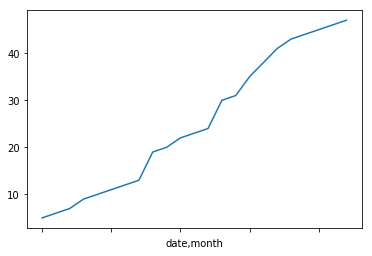

In [679]:
a.cumsum().plot()

In [687]:
c.pivot_table('title', index='month',
              columns='date', aggfunc='cumsum')
#plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
#plt.ylabel('mean births by day');

month,1,2,3,4,5,6,8,9,10,11,12
date,,,,,,,,,,,
2016,5.0,NaN,1.0,NaN,1.0,2.0,1.0,NaN,1.0,1.0,1.0
2017,6.0,NaN,1.0,2.0,1.0,1.0,NaN,NaN,6.0,1.0,NaN
2018,4.0,3.0,3.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0


In [702]:
bib_df['dates'] = pd.to_datetime(bib_df.month + " " + bib_df.day.map(str) + ", " + bib_df.date.map(str))

In [707]:
time_series = bib_df[bib_df['usedUQLab']].groupby('dates').count()['title']

In [724]:
bib_df[bib_df['usedUQLab']]

,ENTRYTYPE,ID,abstract,author,booktitle,date,day,doi,journal,keywords,month,pages,piis,title,url,domain,usedUQLab,usage,dates
0,article,Fengjie2018,Comparing existing design methodologies for ar...,Tan Fengjie and Tom Lahmer,NaN,2018,02,10.1080/0305215X.2017.1409348,Engineering Optimization,"civil engineering, used UQLab",September,1470-1482,85038396163,Shape optimization based design of arch-type d...,http://dx.doi.org/10.1080/0305215X.2017.1409348,civil engineering,True,None,2018-09-02
3,inproceedings,Barbi2018,© 2018 IEEE. This paper deals with the uncerta...,M. Barbi and H. M. Torun and M. Swaminathan an...,2018 IEEE 22nd Workshop on Signal and Power In...,2018,29,10.1109/SaPIW.2018.8401677,NaN,"electrical engineering, used UQLab",June,1-4,85050460012,Uncertainty quantification of SiP based integr...,http://dx.doi.org/10.1109/SaPIW.2018.8401677,electrical engineering,True,None,2018-06-29
5,article,Colone2018,The cost of offshore wind turbine substructure...,Lorenzo Colone and Anand Natarajan and Nikolay...,NaN,2018,01,10.1016/j.oceaneng.2018.02.045,Ocean Engineering,"ocean engineering, used UQLab",May,295-309,85042905073,Impact of turbulence induced loads and wave ki...,http://dx.doi.org/10.1016/j.oceaneng.2018.02.045,ocean engineering,True,None,2018-05-01
6,article,Cheng2018,© 2017 Elsevier Inc. Polynomial chaos expansio...,Kai Cheng and Zhenzhou Lu,NaN,2018,15,10.1016/j.amc.2017.11.044,Applied Mathematics and Computation,"computational science and engineering, used UQLab",April,17-30,85037524488,Sparse polynomial chaos expansion based on D-M...,http://dx.doi.org/10.1016/j.amc.2017.11.044,computational science and engineering,True,None,2018-04-15
8,article,Toe2018,"© 2018, Springer-Verlag GmbH Austria, part of ...",David Toe and Alessio Mentani and Laura Govoni...,NaN,2018,01,10.1007/s00603-017-1394-9,Rock Mechanics and Rock Engineering,"geomechanics, used UQLab",April,1097-1109,85040370552,Introducing Meta-models for a More Efficient H...,http://dx.doi.org/10.1007/s00603-017-1394-9,geomechanics,True,None,2018-04-01
9,article,Ni2018,© 1969-2012 IEEE. Knowledge of the impact of u...,Fei Ni and Michiel Nijhuis and Phuong H. Nguye...,NaN,2018,01,10.1109/TPWRS.2017.2719046,IEEE Transactions on Power Systems,"electrical engineering, used UQLab",March,1670-1682,85023758823,Variance-Based Global Sensitivity Analysis for...,http://dx.doi.org/10.1109/TPWRS.2017.2719046,electrical engineering,True,None,2018-03-01
10,article,Dutta2018,"© 2017, Springer-Verlag GmbH Germany.Tensile m...",Subhrajit Dutta and Siddhartha Ghosh and Manda...,NaN,2018,01,10.1007/s00158-017-1802-5,Structural and Multidisciplinary Optimization,"civil engineering, used UQLab",March,1149-1161,85029009303,Optimisation of tensile membrane structures un...,http://dx.doi.org/10.1007/s00158-017-1802-5,civil engineering,True,None,2018-03-01
11,article,Turati2018,© 2017 Elsevier LtdThe identification undesire...,Pietro Turati and Antonio Cammi and Stefano Lo...,NaN,2018,01,10.1016/j.pnucene.2017.11.013,Progress in Nuclear Energy,"nuclear engineering, used UQLab",March,176-190,85037379518,Adaptive simulation for failure identification...,http://dx.doi.org/10.1016/j.pnucene.2017.11.013,nuclear engineering,True,None,2018-03-01
12,inproceedings,Palar2018,"© 2017 IEEE. In this paper, we explore the use...",Pramudita Satria Palar and Koji Shimoyama,2017 IEEE Symposium Series on Computational In...,2018,02,10.1109/SSCI.2017.8280831,NaN,"computational science and engineering, used UQ...",February,1-8,85046164050,Polynomial-chaos-kriging-assisted efficient gl...,http://dx.doi.org/10.1109/SSCI.2017.8280831,computational science and engineering,True,optimization,2018-02-02
13,article,Hariri-Ardebili2018,© 2017 Politechnika Wrocławska Deterministic a...,Mohammad Amin Hariri-Ardebili and Farhad Pourk...,NaN,2018,01,10.1016/j.acme.2017.09.003,Archives of Civil and Mechanical Engineering,"civil engineering, used UQLab",February,592-610,85033218669,Simplified reliability analysis of 

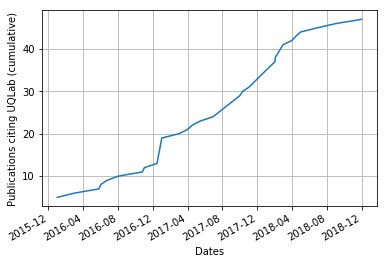

In [726]:
time_series.cumsum().plot()
plt.xlabel('Dates')
plt.ylabel('Publications citing UQLab (cumulative)')
plt.grid()
plt.savefig('citing.pdf')